# 💻 **PROYECTO DATA SCIENCE: PREDICCIÓN RIESGO CARDÍACO A PARTIR DE UN MODELO DE CLASIFICACIÓN**

***2da Entrega - Trabajo Final***

**Comisión:** 49125

**Alumno:** Martinez Mario Alejandro

## 💗⚕ **ABSTRACT: ¿Qué es el riesgo de ataque cardíaco?**
> Un **ataque cardíaco** se define como la necrosis isquémica del corazón, generalmente causada por una obstrucción de las arterias que lo irrigan.

Los infartos, y en general, las enfermedades cardiovasculares son la principal causa de muerte tanto en hombres como en mujeres en todo el mundo. Una detección temprana de esta cardiopatía aumentaría las posibilidades de tratamiento y de prevención. Estas patologías no se producen por una única causalidad sino que existen muchos factores de riesgo dentro de los cuales podríamos mencionar otras patologías, como la hipertensión arterial o la diabetes, antecedentes familiares o propios respecto a cardiopatías y hábitos relacionados al ejercicio, el descanso y al día a día de los pacientes.

El dataset analizado nos presenta distintas características de pacientes que constituyen factores de riesgo que pueden desencadenar o influir en la presencia y/o riesgo de una enfermedad cardiovascular. También encontramos una clasificación por edad, sexo y país de nacimiento.

Nuestra investigación estará enfocada en el análisis, estudio y desarrollo de un modelo de clasificación que nos permita predecir, a partir de los datos clínicos, ataques cardíacos. Para este punto mencionamos que existe en el dataset una variable 'target' definida con los valores 1 o 0.

> **El objetivo general del proyecto** será entonces poder desarrollar un modelo desarrollar un modelo de clasificación para predecir un ataque cardíaco.

## ❔ **HIPÓTESIS Y PREGUNTAS DE INTERES: ¿Qué objetivo tenemos?**

Una hipótesis es una idea que se plantea para explicar un determinado fenómeno o situación y que se intenta comprobar o rechazar mediante la experimentación u otros métodos. Hablando de nuestra hipótesis nula (h0) decimos que:

> Existen uno o más factores de riesgo en los pacientes que su presencia está relacionada al riesgo de ataque cardíaco.

A partir de lo antes mencionado es que también liberamos nuestra hipotesis alternativa (h1), que contradice o pretende demostrar lo contrario a lo planteado en la 'nula'.

* ¿Cuál es la distribución de nuestra muestra según el riesgo cardíaco?
* ¿Puede considerarse el género como una factor de riesgo para el ataque cardíaco?
* ¿Tiene alguna relación la ubicación geográfica de los pacientes con su patología?
* ¿Cómo se distribuye en cada continente el riesgo de ataque cardíaco?
* ¿Qué factores tienen una implicancia directa con el riesgo cardíaco?
* ¿Existe alguna relación demostrable entre los factores observados en la muestra?


## 📎 **OBTENCIÓN DE DATOS. ¡Importando nuestros datos!**
EL presente dataset fue obtenido desde Keaggle, es decir una fuente externa de datos: https://www.kaggle.com/code/raaggeesingh/heart-attack-risk-prediction/input

> **META DATA:** Sourav Banerjee (usuario Keaggle: https://www.kaggle.com/iamsouravbanerjee) realizó la preparación y limpieza de este datasets, el cual fue obtenido de manera artificial desde ChatGPT. Esta iniciativa tiene como objetivo facilitar el entendimiento de modelos de Machine Learning aplicados en datos relacionados al Riesgo de Ataque Cardíaco en una muestra de pacientes que simula posibles escenarios reales. Tiene un enfoque orientado al Aprendizaje.

A continuación realizaremos la importación de librerías y la conexión a la carpeta de drive a través de un path a donde tenemos archivados nuestros entregables. Observemos que las librerías definidas a continuación son las utilizadas en los procesos de exploración, limpieza y análisis de los datos obtenidos.

In [ ]:
# Importo librerías
import pandas as pd
import numpy as np

# Librerías para visualizaciones
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Realizo conexión a Google Drive donde previamente guardé mis archivos
from google.colab import drive
import os
drive.mount('/content/gdrive/')

# Defino el path para mis datasets
path = '/content/gdrive/MyDrive/DS-C_49125-Mario_Martinez/Datasets/'

# Utilizo pandas para realizar función read y leer el datasets
df_2 = pd.read_csv(path+ 'Predicción_ataque_cardíaco.csv', sep=",")

# Traemos una primer visualización rápida de nuestro dataset
df_2.head()

Mounted at /content/gdrive/


,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


## 🔍 **DATA WRANGLING. Conociendo nuestro dataset...**

### **ANÁLISIS EXPLORATORIO: ¿Cómo es nuestro dataset?**

A partir del método *head()* realizamos una observación de los datos presentados con los cuales trabajaremos. A partir de esta etapa comenzaremos a mapear y analizar los datos según su tipología, cantidad de registros y una descripción estadística de sus columnas.

In [ ]:
# Utilizo atributo shape para obtener más información de mi dataset, se observa que cumple con los requisitos solicitados
df_2.shape

(8763, 26)

In [ ]:
# Utilizo atributo columns para tener un registro de las columnas del dataframe
df_2.columns

Index(['Patient ID', 'Age', 'Sex', 'Cholesterol', 'Blood Pressure',
       'Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity',
       'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet',
       'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Country',
       'Continent', 'Hemisphere', 'Heart Attack Risk'],
      dtype='object')

✅ El dataset contiene 26 columnas y 8763 filas, que representan 8763 registros. Continuaremos nuestra exploración buscando conocer cuál es el tipo de dato para cada columna:

In [ ]:
# Utlizo atributo dtypes para conocer columnas y tipos
df_2.dtypes

Patient ID                          object
Age                                  int64
Sex                                 object
Cholesterol                          int64
Blood Pressure                      object
Heart Rate                           int64
Diabetes                             int64
Family History                       int64
Smoking                              int64
Obesity                              int64
Alcohol Consumption                  int64
Exercise Hours Per Week            float64
Diet                                object
Previous Heart Problems              int64
Medication Use                       int64
Stress Level                         int64
Sedentary Hours Per Day            float64
Income                               int64
BMI                                float64
Triglycerides                        int64
Physical Activity Days Per Week      int64
Sleep Hours Per Day                  int64
Country                             object
Continent  

✅ La mayoría del dataset está compuesto por variables númericas enteras. En menor medida encontramos el tipo "object" relacionado a variables categóricas y por último el tipo "float" referido a variables numéricas con decimales.

Por la importancia de entender los datos y conocer qué factor se encuentra representado en cada variable dejamos a continuación la definición de nuestro diccionario de datos:


📔 **Definición de Diccionario de datos**
* 'Patient ID', ID del paciente en registro de datos
* 'Age', númerica - Edad del paciente.
* 'Sex', categórica - Género del paciente.
* 'Cholesterol', numérica - Nivel de colesterol
* 'Blood Pressure', numérica - Presión sanguínea
* 'Heart Rate', numérica - Ritmo cardíaco
* 'Diabetes', categórica - Si el paciente posee diabetes
* 'Family History', categórica - Si tiene antecedentes de problemas cardiacos en la familia
* 'Smoking', categórica - Si es fumador o no
* 'Obesity', categórica - Si es obeso o no
* 'Alcohol Consumption', categórica - Consumo de alcohol
* 'Exercise Hours Per Week', numérica - Horas de ejercicio por semana
* 'Diet', categórica - Habitos alimenticios
* 'Previous Heart Problems', categórica - Antecedentes cardiacos
* 'Medication Use', categórica - Medicación Habitual
* 'Stress Level', numérica - Nivel de estres
* 'Sedentary Hours Per Day', numérica - Horas de actividad sedentaria por día
* 'Income', numérica - Nivel de ingresos del paciente
* 'BMI', numérica - Indice de masa corporal del paciente
* 'Triglycerides', numérica - Nivel de trigliceridos del paciente
* 'Physical Activity Days Per Week', numérica - Actividad Física por días por semana
* 'Sleep Hours Per Day', numérica - Horas de sueño por día
* 'Country', categórica - País de residencia
* 'Continent', categórica - Continente
* 'Hemisphere', categórica - Hemisferio
* 'Heart Attack Risk', categórica - Presencia de riesgo cardíaco

✅ Para comenzar a entender la calidad de los datos es que trabajaremos entendiendo cuáles son sus valores. Aplicaremos a continuación un ciclo *for* junto al atributo *unique()*

In [ ]:
# Utilizo un ciclo for para determinar para cada columna del dataset sus valores unicos (función unique)
for i in range(len(df_2.columns)):
  print(f"Columna:\t {df_2.columns[i]}", df_2.iloc[:, i].unique(), "\n")

Columna:	 Patient ID ['BMW7812' 'CZE1114' 'BNI9906' ... 'XKA5925' 'EPE6801' 'ZWN9666'] 

Columna:	 Age [67 21 84 66 54 90 20 43 73 71 77 60 88 69 38 50 45 36 48 40 79 63 27 25
 86 42 52 29 30 47 44 33 51 70 85 31 56 24 74 72 55 26 53 46 57 22 35 39
 80 65 83 82 28 19 75 18 34 37 89 32 49 23 59 62 64 61 76 41 87 81 58 78
 68] 

Columna:	 Sex ['Male' 'Female'] 

Columna:	 Cholesterol [208 389 324 383 318 297 358 220 145 248 373 374 228 259 122 379 166 303
 340 294 359 202 133 159 271 273 328 154 135 197 321 375 360 263 201 347
 129 229 251 121 190 185 279 336 192 180 203 368 222 243 218 120 285 377
 369 311 139 266 153 339 329 333 398 124 183 163 362 390 200 396 255 209
 247 250 227 246 223 330 195 194 178 155 240 237 216 276 224 326 198 301
 314 304 334 213 254 230 316 277 388 206 384 205 261 308 338 382 291 168
 171 378 253 245 226 281 123 173 231 234 268 306 186 293 161 380 239 149
 320 219 335 265 126 307 270 225 193 148 296 136 364 353 252 232 387 299
 357 214 370 345 351 344 152 15

✅ Analizando los valores únicos de cada categoría encontramos para trabajar:
* Dropear Patient ID, Income, Country y Hemisphere
* Transformar variables float BMI y Exercise hours for week en int
* Transformar a través de un split la variable Blood Pressure
* Corregir valores 'Australia' en variable Continent por 'Oceania'
* Transformar variables categóricas que presentan valores distintos a 0 y 1, en valores numéricos para poder trabajar con mejor calidad el dataset.

In [ ]:
# Utilizo método info para conocer las características del dataset
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Blood Pressure                   8763 non-null   object 
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   int64  
 7   Family History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol Consumption              8763 non-null   int64  
 11  Exercise Hours Per Week          8763 non-null   float64
 12  Diet                

In [ ]:
# Utilizo función describe para conocer los principales estadísticos. Traspongo filas por columnas para analizar la información
df_2.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Patient ID,8763,8763,BMW7812,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,8763.0,NaN,NaN,NaN,53.707977,21.249509,18.0,35.0,54.0,72.0,90.0
Sex,8763,2,Male,6111,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cholesterol,8763.0,NaN,NaN,NaN,259.877211,80.863276,120.0,192.0,259.0,330.0,400.0
Blood Pressure,8763,3915,146/94,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Heart Rate,8763.0,NaN,NaN,NaN,75.021682,20.550948,40.0,57.0,75.0,93.0,110.0
Diabetes,8763.0,NaN,NaN,NaN,0.652288,0.476271,0.0,0.0,1.0,1.0,1.0
Family History,8763.0,NaN,NaN,NaN,0.492982,0.499979,0.0,0.0,0.0,1.0,1.0
Smoking,8763.0,NaN,NaN,NaN,0.896839,0.304186,0.0,1.0,1.0,1.0,1.0
Obesity,8763.0,NaN,NaN,NaN,0.501426,0.500026,0.0,0.0,1.0,1.0,1.0


✅ Haciendo un análisis de esta descripción estadística podemos observar el comportamiento de las variables categóricas con valores booleanos entendiendo que si su promedio está más cercano a 1, esa condición de salud o factor de riesgo en los pacientes tendrá una mayor presencia siendo una característica de la muestra. Por ejemplo, la muestra contiene un 89% de personas registradas como fumadores.

✅ Luego las variables numéricas nos irán dando características como que el promedio de persona en nuestra muestra está en los 53 años, BMI de 29 y con un ingreso de 158263 - no se tiene información sobre la moneda en la cual se establecieron estos valores y por ende la correspondencia del tipo de cambio -, que duermen aproximadamente 7hs diarias y realizan 10hs de ejercicios en 3 días a la semana; esto con un nivel de sedentarismo de 6hs por día  . Existe un nivel de estrés cercano a 5/10.

✅ Por último, las variables categóricas hemos determinado aquellas con mayor frecuencia y cuál es el valor de esta frecuencia.

### **IDENTIFICACIÓN DE VALORES NULOS Y DUPLICADOS. ¿Qué calidad de datos tenemos?**

In [ ]:
# Utilizo función isna + sum para conocer nulos - Debo ordenar valores de manera descendente para ver columnas con mayor % de nulos
df_2.isna().sum().sort_values(ascending = False)

Patient ID                         0
Age                                0
Hemisphere                         0
Continent                          0
Country                            0
Sleep Hours Per Day                0
Physical Activity Days Per Week    0
Triglycerides                      0
BMI                                0
Income                             0
Sedentary Hours Per Day            0
Stress Level                       0
Medication Use                     0
Previous Heart Problems            0
Diet                               0
Exercise Hours Per Week            0
Alcohol Consumption                0
Obesity                            0
Smoking                            0
Family History                     0
Diabetes                           0
Heart Rate                         0
Blood Pressure                     0
Cholesterol                        0
Sex                                0
Heart Attack Risk                  0
dtype: int64

In [ ]:
# Aplico otro método para conocer valores null
missing_data = df_2.isnull()
missing_data.head(5)

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
# Revisión de nulls en columnas
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

Patient ID
False    8763
Name: Patient ID, dtype: int64

Age
False    8763
Name: Age, dtype: int64

Sex
False    8763
Name: Sex, dtype: int64

Cholesterol
False    8763
Name: Cholesterol, dtype: int64

Blood Pressure
False    8763
Name: Blood Pressure, dtype: int64

Heart Rate
False    8763
Name: Heart Rate, dtype: int64

Diabetes
False    8763
Name: Diabetes, dtype: int64

Family History
False    8763
Name: Family History, dtype: int64

Smoking
False    8763
Name: Smoking, dtype: int64

Obesity
False    8763
Name: Obesity, dtype: int64

Alcohol Consumption
False    8763
Name: Alcohol Consumption, dtype: int64

Exercise Hours Per Week
False    8763
Name: Exercise Hours Per Week, dtype: int64

Diet
False    8763
Name: Diet, dtype: int64

Previous Heart Problems
False    8763
Name: Previous Heart Problems, dtype: int64

Medication Use
False    8763
Name: Medication Use, dtype: int64

Stress Level
False    8763
Name: Stress Level, dtype: int64

Sedentary Hours Per Day
False    8763
Name: 

✅ **Imputación de los valores perdidos**

Aunque el dataset no presente valores nulos o pérdidos deberíamos orientarnos a a una imputación consistente en rellenar con la media de los datos de la variable en el caso de que se trate de una variable numérica; y para el caso de las variables categóricas imputamos los valores perdidos con la moda de la variable.


In [ ]:
# Utilizo función duplicated para conocer duplicados
df_2.duplicated().sum()

0

✅ El dataset no presenta valores nulos ni duplicados.
Por lo que no deberemos realizar tratamientos respecto a estos puntos pero incorporaremos la matriz de la libreria missingno para tener una representación gráfica de lo relevado.

<Axes: >

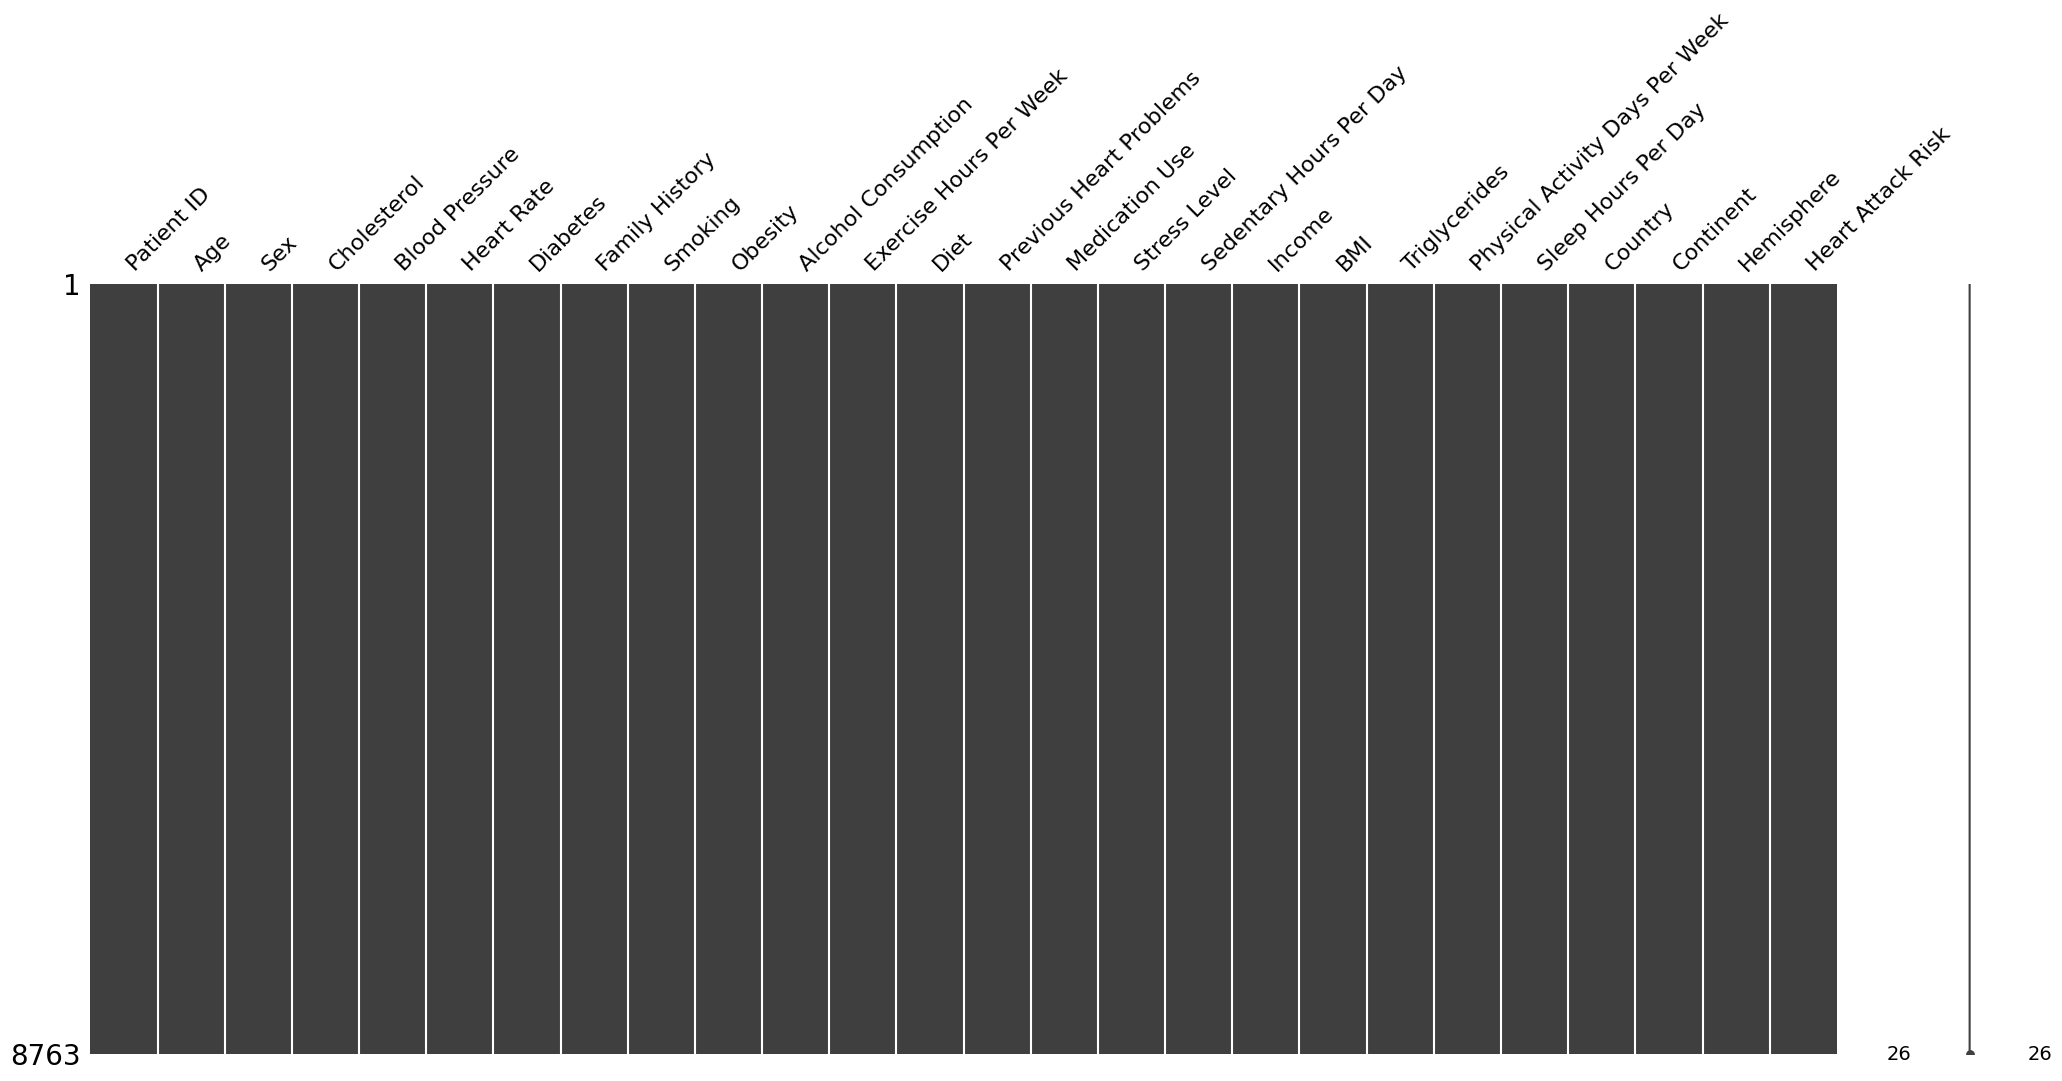

In [ ]:
msno.matrix(df_2)

### **LIMPIEZA Y TRANSFORMACIÓN DE DATOS. ¡Mejoramos nuestros datos!**

In [ ]:
# Dropeo columnas que no serán utilizables para el análisis
df_2 = df_2.drop(['Patient ID', 'Income', 'Country', 'Hemisphere'], axis=1)
df_2

,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,...,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Continent,Heart Attack Risk
0,67,Male,208,158/88,72,0,0,1,0,0,...,0,0,9,6.615001,31.251233,286,0,6,South America,0
1,21,Male,389,165/93,98,1,1,1,1,1,...,1,0,1,4.963459,27.194973,235,1,7,North America,0
2,21,Female,324,174/99,72,1,0,0,0,0,...,1,1,9,9.463426,28.176571,587,4,4,Europe,0
3,84,Male,383,163/100,73,1,1,1,0,1,...,1,0,9,7.648981,36.464704,378,3,4,North America,0
4,66,Male,318,91/88,93,1,1,1,1,0,...,1,0,6,1.514821,21.809144,231,1,5,Asia,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,60,Male,121,94/76,61,1,1,1,0,1,...,1,1,8,10.806373,19.655895,67,7,7,Asia,0
8759,28,Female,120,157/102,73,1,0,0,1,0,...,0,0,8,3.833038,23.993866,617,4,9,North America,0
8760,47,Male,250,161/75,105,0,1,1,1,1,...,1,0,5,2.375214,35.406146,527,4,4,South America,1
8761,36,Male,178,119/67,60,1,0,1,0,0,...,1,1,5,0.029104,27.294020,114,2,8,South America,0


In [ ]:
# Reemplazo en dataframe original el valor Australia por Oceania.
df_2['Continent'] = df_2['Continent'].replace({'Australia': 'Oceania'})
df_2['Continent'].unique()

array(['South America', 'North America', 'Europe', 'Asia', 'Africa',
       'Oceania'], dtype=object)

In [ ]:
# Reemplazo en dataframe original el valor de la columna BMI redondeada a entero
df_2['BMI'] = df_2['BMI'].round(0).astype(int)
print("Valores para BMI:", df_2['BMI'].unique())

# Reemplazo en dataframe original el valor de la columna Exercise Hours Per Week redondeada a entero
df_2['Exercise Hours Per Week'] = df_2['Exercise Hours Per Week'].round(0).astype(int)
print("Valores para Exercise Hours Per Week:", df_2['Exercise Hours Per Week'].unique())

# Reemplazo en dataframe original el valor de la columna Sedentary Hours Per Day redondeada a entero
df_2['Sedentary Hours Per Day'] = df_2['Sedentary Hours Per Day'].round(0).astype(int)
print("Valores para Sedentary Hours Per Day:", df_2['Sedentary Hours Per Day'].unique())

Valores para BMI: [31 27 28 36 22 20 29 23 32 35 26 25 37 30 38 39 19 34 40 18 24 33 21]
Valores para Exercise Hours Per Week: [ 4  2 10  6  1  3 17  0  8 20 15  9  5 14 11 18 19 12  7 16 13]
Valores para Sedentary Hours Per Day: [ 7  5  9  8  2  1 11  4 10  6  3 12  0]


In [ ]:
# Defino dos funciones para de la variable Blood Pressure poder tomar sus valores de sístole y diástole.
# "La presión sanguínea se mide tanto en el momento en el que el corazón se contrae, llamado sístole, como en el momento en el que se relaja, llamado diástole."
def handle_blood_pressure_systolic(value):
    value = str(value) # modifico a str para poder separar cadena de texto al aplicar split
    value = value.split('/')
    return int(value[0]) # tomo primera parte de la cadena de texto

def handle_blood_pressure_diastolic(value):
    value = str(value)
    value = value.split('/')
    return int(value[1]) # tomo segunda parte de la cadena de texto

# Utilizo apply para ir agregando los valores a la columna
df_2['Systolic_pressure'] = df_2['Blood Pressure'].apply(handle_blood_pressure_systolic)
df_2['Diastolic_pressure'] = df_2['Blood Pressure'].apply(handle_blood_pressure_diastolic)

# Finalmente dropeo la columna origen que contenía las dos resultantes
df_2.drop(columns='Blood Pressure', axis=1, inplace=True)
df_2.head()

,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,...,Stress Level,Sedentary Hours Per Day,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Continent,Heart Attack Risk,Systolic_pressure,Diastolic_pressure
0,67,Male,208,72,0,0,1,0,0,4,...,9,7,31,286,0,6,South America,0,158,88
1,21,Male,389,98,1,1,1,1,1,2,...,1,5,27,235,1,7,North America,0,165,93
2,21,Female,324,72,1,0,0,0,0,2,...,9,9,28,587,4,4,Europe,0,174,99
3,84,Male,383,73,1,1,1,0,1,10,...,9,8,36,378,3,4,North America,0,163,100
4,66,Male,318,93,1,1,1,1,0,6,...,6,2,22,231,1,5,Asia,0,91,88


In [ ]:
# Previamente a realizar la transformación de las variables categóricas realizaremos una copia del dataset para utilizarlo posteriormente en el análisis de las variables
df_2_copy = df_2.copy()

# Tomamos el df sobre el cuál venimos trabajando y luego aplicamos el one hot encoding para que todas las variables categóricas tomen un valor.
# Aplicar one hot encoding a la columna 'Sex' - Diet - Continent
df_2 = pd.get_dummies(df_2, columns=['Sex'], prefix=['Sex'])
df_2 = pd.get_dummies(df_2, columns=['Diet'], prefix=['Diet'])
df_2 = pd.get_dummies(df_2, columns=['Continent'], prefix=['Cont'])

df_2.head()

,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Previous Heart Problems,...,Sex_Male,Diet_Average,Diet_Healthy,Diet_Unhealthy,Cont_Africa,Cont_Asia,Cont_Europe,Cont_North America,Cont_Oceania,Cont_South America
0,67,208,72,0,0,1,0,0,4,0,...,1,1,0,0,0,0,0,0,0,1
1,21,389,98,1,1,1,1,1,2,1,...,1,0,0,1,0,0,0,1,0,0
2,21,324,72,1,0,0,0,0,2,1,...,0,0,1,0,0,0,1,0,0,0
3,84,383,73,1,1,1,0,1,10,1,...,1,1,0,0,0,0,0,1,0,0
4,66,318,93,1,1,1,1,0,6,1,...,1,0,0,1,0,1,0,0,0,0


✅ El principal objetivo de realizar esta conversión del tipo de las variables redondeando sus valores es mejorar la calidad de los datos y que tengan una mayor representación en la incidencia de nuestra investigación. Por ejemplo, si bien el dato númerico del BMI se determina de manera exacta conocemos que este índice tiene una representatividad según rangos que no se definen en el valor de sus decimales.

## 📈 **ANÁLISIS DE VARIABLES: ¡Manos a la obra!**

> Hasta el momento hemos realizado una exploración del dataset, conociendo los atributos de sus datos, la calidad de los mismos y entendiendo cuál es el contexto análitico sobre el cuál trabajaremos. El objetivo a continuación es comenzar a trabajar sobre nuestra hipótesis conociendo en mayor profundidad cuáles son los comportamientos de los distintos factores para nuestra variable target, es decir, aquellos pacientes con riesgo cardíaco.

### 📓 **ANÁLISIS UNIVARIADO: ¿Qué variables son las principales?**

>Comenzaremos con el análisis univariado con el objetivo de comprender el comportamiento de las principales características de nuestro dataset:

🟣 **DISTRIBUCIÓN DE VARIABLE 'HEART ATTACK RISK' - VARIABLE TARGET**

<ipython-input-18-47919d4842cd>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax= sns.countplot(x=df_2['Heart Attack Risk'], palette='Blues')


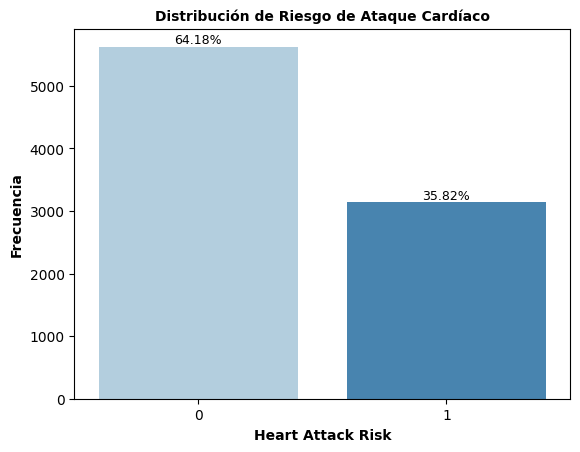

In [ ]:
# Distribución de variable Heart Attack Risk - Variable "target"

# Calcular los porcentajes
total = len(df_2['Heart Attack Risk'])
counts = df_2['Heart Attack Risk'].value_counts()
percentages = [(count / total) * 100 for count in counts]

ax= sns.countplot(x=df_2['Heart Attack Risk'], palette='Blues')
ax.set_xlabel('Heart Attack Risk', fontsize=10, fontweight='bold')
ax.set_ylabel('Frecuencia', fontsize=10, fontweight='bold')
ax.set_title('Distribución de Riesgo de Ataque Cardíaco', fontweight = 'bold', fontsize=10)

for i, bar in enumerate(ax.patches):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{percentages[i]:.2f}%', ha='center', va='bottom', fontsize=9)


✅ La columna **'Heart Attack Risk'** es una variable categórica que nos indica que de nuestro dataset de 8.763 registros, un total de 5.624 personas no presentan riesgo cardíaco aparente mientras que 3.139 personas se encuentran categorizadas con riesgo cardíaco por sus antecedentes. Esta variable la hemos representado en un gráfico de barras junto a su frecuencia absoluta. Para concluir, encontramos la posibilidad de un dataset desbalanceado respecto a su variable 'target'

🟣 **DISTRIBUCIÓN DE VARIABLE 'SEX'**

<ipython-input-19-6ffb3f2b0483>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax= sns.countplot(x=df_2_copy['Sex'], palette='Greens')


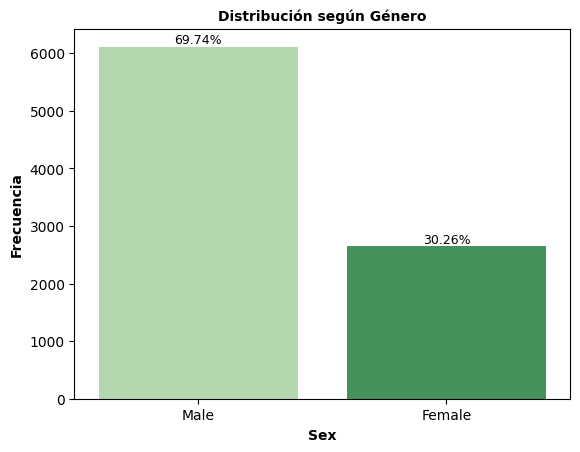

In [ ]:
# Distribución de variable Género

# Calcular los porcentajes
total = len(df_2_copy['Sex'])
counts = df_2_copy['Sex'].value_counts()
percentages = [(count / total) * 100 for count in counts]

ax= sns.countplot(x=df_2_copy['Sex'], palette='Greens')
ax.set_xlabel('Sex', fontsize=10, fontweight='bold')
ax.set_ylabel('Frecuencia', fontsize=10, fontweight='bold')
ax.set_title('Distribución según Género', fontweight = 'bold', fontsize=10)

for i, bar in enumerate(ax.patches):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{percentages[i]:.2f}%', ha='center', va='bottom', fontsize=9)

✅ Si recordamos previo al hacer la transformación de nuestros datos, realizamos un *copy* sobre nuestra dataset. Esto nos permitirá trabajar aquellas variables categóricas a las cuales le fuimos asignando un valor booleano (0-1).

La columna **'Sexo'** es una variable categórica que nos indica que un total de 6.111 pacientes pertenecen al género masculino mientras que 2.652 pacientes al femenino. Esta variable la hemos representado en un gráfico de barras junto a su frecuencia absoluta

🟣 **DISTRIBUCIÓN DE VARIABLE CONTINENT**

> Para trabajar con la variable 'Continent' comenzaremos por realizar una agregación por cada valor único de la misma. De esta manera podremos establecer la cantidad de registros o muestras tomadas por cada ubicación geográfica y además conocer la condición de la muestra, es decir si presentan riesgo cardíaco.

Para este punto hemos creado un dataset con la longitud y latitud central para cada continente el cual hemos traído a partir de un *merge()* al dataset obtenido del *group by()* antes mencionado. De esta manera tendremos como resultante dos mapas, representando la cantidad de muestras y la sumatoria de los pacientes con riesgo cardíaco.

In [ ]:
import folium # Importo librería para realizar mapa de calor
from folium.plugins import HeatMap

df_lat_lon = pd.read_csv(path+ 'Lat-long.csv', sep=";") # Creo dataset con longitudes y latitudes centrales de los continentes.
df_continent = df_2_copy[['Continent', 'Heart Attack Risk']].groupby(by=['Continent'], as_index=False).agg(
        HeartAttackRisk_Count=('Heart Attack Risk', 'sum'),
        Patient_Count=('Heart Attack Risk', 'count'),
      )

df_continent['pct_har_patient']= round(df_continent['HeartAttackRisk_Count'] / df_continent['Patient_Count'] * 100, 2)

df_merged = pd.merge(df_lat_lon, df_continent, on='Continent')

# Muestra el DataFrame combinado
print(df_merged)


       Continent   Lat   Long  HeartAttackRisk_Count  Patient_Count  \
0         Europe  50.0   15.0                    775           2241   
1           Asia  35.0   95.0                    900           2543   
2        Oceania -25.0  135.0                    319            884   
3  North America  45.0 -100.0                    324            860   
4  South America -15.0  -60.0                    499           1362   
5         Africa   0.0   20.0                    322            873   

   pct_har_patient  
0            34.58  
1            35.39  
2            36.09  
3            37.67  
4            36.64  
5            36.88  


In [ ]:
# Crear mapa centrado en un punto medio
mapa_calor = folium.Map(location=[0, 0], zoom_start=2, width='100%', height='100%')


HeatMap(data=df_merged[['Lat', 'Long', 'HeartAttackRisk_Count']], min_opacity=0.8, radius=30).add_to(mapa_calor) # Agregar datos como capa de calor
folium.LayerControl().add_to(mapa_calor) # Agregar control de capas

# Mostrar el mapa
mapa_calor

✅ En este primer análisis visual entendemos que existe una mayor incidencia del continente asiático respecto a la muestra con riesgo de ataque cardíaco pero también así a la cantidad de pacientes registrados. Es por esto que para indicar realmente si tiene una incidencia la ubicación geográfica se incorporó la columna que calcula el coeficiente entre los pacientes y su condición, teniendo como resultante que los porcentajes presentan una mínima dispersión y variabilidad entre ellos.

🟣 **DISTRIBUCIÓN DE VARIABLE 'AGE'**

count    8763.000000
mean       53.707977
std        21.249509
min        18.000000
25%        35.000000
50%        54.000000
75%        72.000000
max        90.000000
Name: Age, dtype: float64


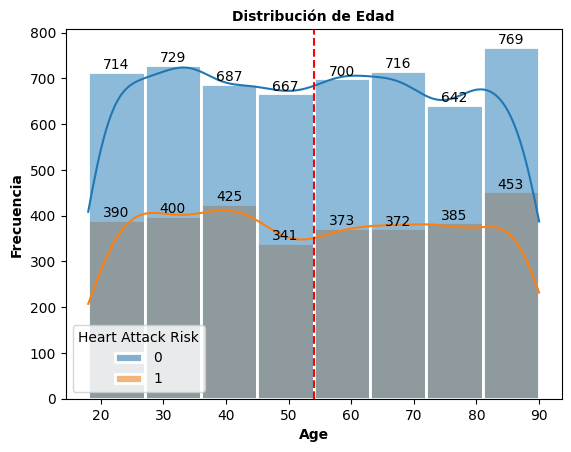

In [ ]:
# Distribución de variable Age

print(df_2['Age'].describe())

ax= sns.histplot(x=df_2['Age'], bins=8, kde=True, edgecolor = "white", linewidth = 2, hue= df_2['Heart Attack Risk'])
ax.set_xlabel('Age', fontsize=10, fontweight='bold')
ax.set_ylabel('Frecuencia', fontsize=10, fontweight='bold')
ax.set_title('Distribución de Edad', fontweight = 'bold', fontsize=10)
plt.axvline(x = df_2['Age'].median(), color = 'r', linestyle = '--')

for et in ax.containers:
        ax.bar_label(et, fontsize=10)

✅ En la anterior gráfica se observa la distribución de las edades de los pacientes. Teniendo en cuenta que la edad mínima es 18 años y la máxima 90, se establecieron ocho rangos (con el objetivo de lograr una amplitud de 9); esto nos da como resultado que la mayor cantidad de pacientes se encuentran entre los 81-90 años mientras que el menor rango se encuentra entre los 45-54 años aunque entre sus frecuencias absolutas no existe una gran variabilidad.
Esto es porque estamos frente a una variable de distribución uniforme.

### 📓 **ANALISIS BIVARIADO. ¿Cómo relacionar nuestras variables?**

> En la siguiente sección realizaremos el análisis de las distintas variables con respecto a nuestra variable target. Para esto es que clasificaremos las variables en categóricas y numéricas para poder trabajar de manera ordenada y con una visualización adecuada.

In [ ]:
# Traigo nuevamente las columnas
df_2.columns

Index(['Age', 'Cholesterol', 'Heart Rate', 'Diabetes', 'Family History',
       'Smoking', 'Obesity', 'Alcohol Consumption', 'Exercise Hours Per Week',
       'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day',
       'Heart Attack Risk', 'Systolic_pressure', 'Diastolic_pressure',
       'Sex_Female', 'Sex_Male', 'Diet_Average', 'Diet_Healthy',
       'Diet_Unhealthy', 'Cont_Africa', 'Cont_Asia', 'Cont_Europe',
       'Cont_North America', 'Cont_Oceania', 'Cont_South America'],
      dtype='object')

🟣 **VARIABLES CATEGÓRICAS EN RELACIÓN A VARIABLE TARGET**

>A continuación realizaremos un ciclo *for* para conocer cuál es la representación de la condición de riesgo de ataque cardíaco para las distintas variables.

Recordemos que este dataset ya tiene aplicado *dummies* por lo que la representación de los valores 0 en las variables transformadas corresponden a aquellos registros que no cumplen con la condición. Por ejemplo, la agregación 0 para la columna 'Sex_Male' va a representar por consiguiente los valores ciertos para los pacientes del sexo femenino. Es por esto que a los fines prácticos tomamos como dataset base el previo a esta aplicación.

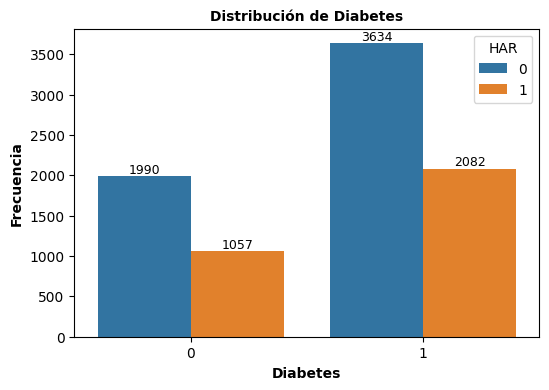

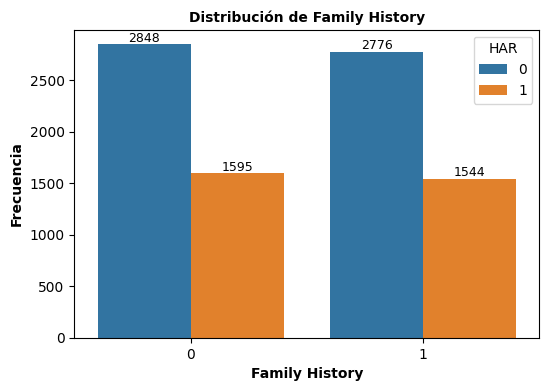

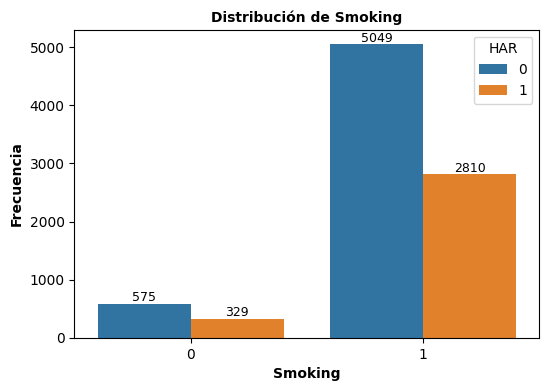

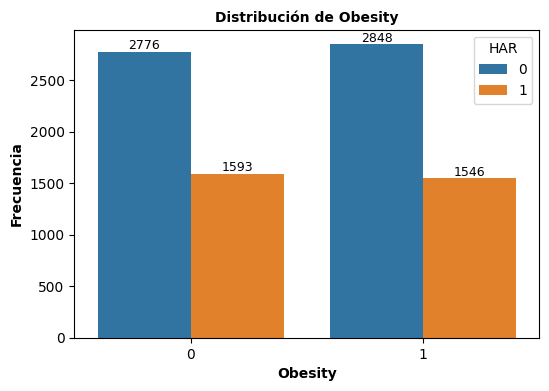

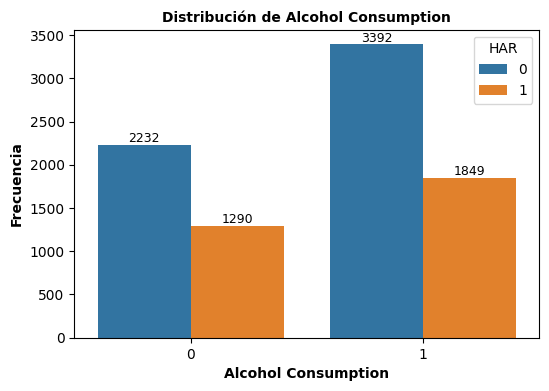

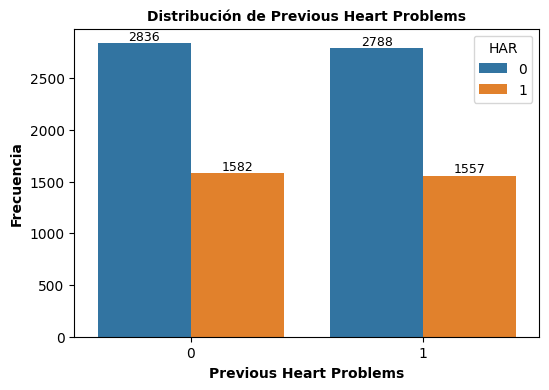

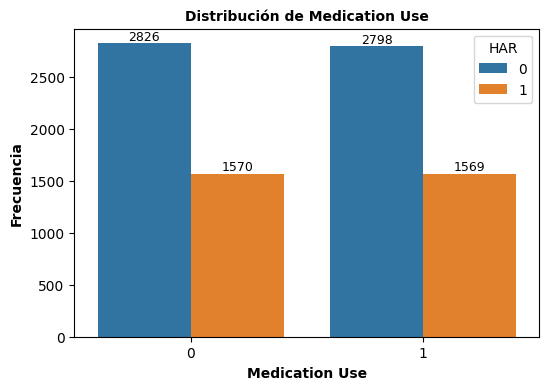

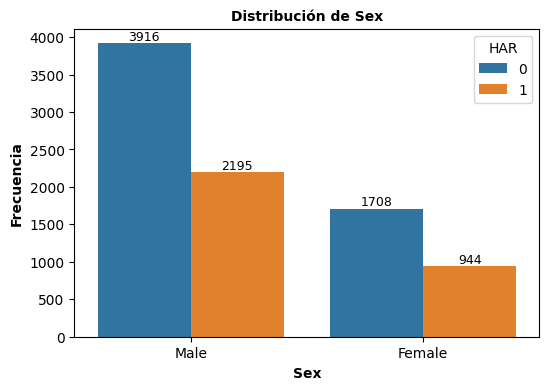

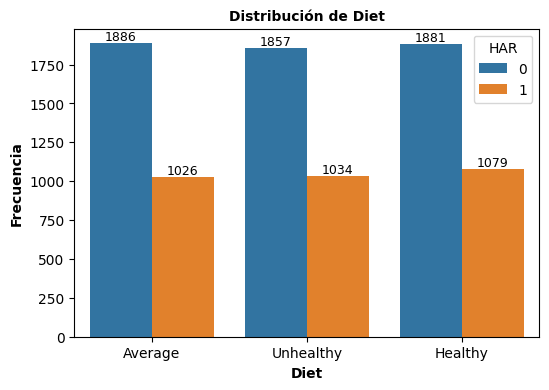

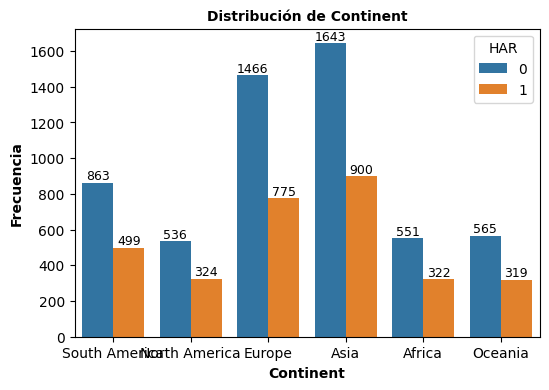

In [ ]:
# Lista de columnas categóricas seleccionadas
c_columns = ['Diabetes', 'Family History', 'Smoking', 'Obesity', 'Alcohol Consumption', 'Previous Heart Problems', 'Medication Use', 'Sex', 'Diet', 'Continent']

# Gráficos de distribución para variables categóricas
for c in c_columns:
    plt.figure(figsize=(6, 4))

# Filtrar el DataFrame para incluir solo las filas donde la columna categórica tiene el valor 1

    ax= sns.countplot(data= df_2_copy, x= c, hue= 'Heart Attack Risk')
    ax.set_title(f'Distribución de {c}', fontweight = 'bold', fontsize=10)
    ax.set_xlabel(c, fontsize=10, fontweight='bold')
    ax.set_ylabel('Frecuencia', fontsize=10, fontweight='bold')
    ax.legend(title='HAR', loc='upper right', bbox_to_anchor=(1.0, 1.0))

    for et in ax.containers:
        ax.bar_label(et, fontsize=9)

✅ Un punto importante a observar es que en las visualizaciones si tomamos en consideración la comparación entre las frecuencias de cero y uno para cada variable y/o categoría parecería tener un comportamiento similar para todos los casos que hemos trabajado en esta sección. Es por eso que complementaremos este análisis calculando el porcentual de representación de los pacientes con riesgo cardíaco para cada valor analizado.

In [ ]:
# Lista de columnas categóricas seleccionadas
c_columns = ['Diabetes', 'Family History', 'Smoking', 'Obesity', 'Alcohol Consumption', 'Previous Heart Problems', 'Medication Use', 'Sex_Female', 'Sex_Male', 'Diet_Average', 'Diet_Healthy',
       'Diet_Unhealthy', 'Cont_Africa', 'Cont_Asia', 'Cont_Europe', 'Cont_North America', 'Cont_Oceania', 'Cont_South America']

# Crear un DataFrame para almacenar las tablas de porcentajes
tables_dict = {}

# Iterar a través de las columnas categóricas
for column in c_columns:
    # Crear una tabla de porcentajes para la columna actual
    df_pivot = df_2[[column, 'Heart Attack Risk']].groupby(by=[column], as_index=False).agg(
        HeartAttackRisk_Count=('Heart Attack Risk', 'sum'),
        Patient_Count=('Heart Attack Risk', 'count')
    )
    df_pivot['% ' + column] = round(df_pivot['HeartAttackRisk_Count'] / df_pivot['Patient_Count'] * 100, 2)

    # Renombrar columnas para que sean únicas
    df_pivot = df_pivot.rename(columns={column: 'Value'})

    # Almacenar la tabla en el diccionario
    tables_dict[column] = df_pivot

# Imprimir las tablas
for column, table in tables_dict.items():
    print(f"Tabla de porcentajes para {column}:")
    print(table)
    print("\n")

Tabla de porcentajes para Diabetes:
   Value  HeartAttackRisk_Count  Patient_Count  % Diabetes
0      0                   1057           3047       34.69
1      1                   2082           5716       36.42


Tabla de porcentajes para Family History:
   Value  HeartAttackRisk_Count  Patient_Count  % Family History
0      0                   1595           4443             35.90
1      1                   1544           4320             35.74


Tabla de porcentajes para Smoking:
   Value  HeartAttackRisk_Count  Patient_Count  % Smoking
0      0                    329            904      36.39
1      1                   2810           7859      35.76


Tabla de porcentajes para Obesity:
   Value  HeartAttackRisk_Count  Patient_Count  % Obesity
0      0                   1593           4369      36.46
1      1                   1546           4394      35.18


Tabla de porcentajes para Alcohol Consumption:
   Value  HeartAttackRisk_Count  Patient_Count  % Alcohol Consumption
0      

✅ En estos ejemplos podemos observar que todo % resultante del cociente entre la cantidad de pacientes registrados para esa condición o variable y aquellos que presentan riesgo cardíaco representan valores muy similares para cualquier característica de nuestro dataset. Analizando sus datos, entendemos que el mayor valor lo encontramos 37.67% para pacientes con riesgo cardíaco en 'North America' y el valor mínimo está representado en un 34.58% para pacientes con riesgo cardíaco en 'Europe'.

Volviendo a la sección de nuestras visualizaciones de mapa, considerando los datos obtenidos anteriormente es real que si bien Asia tiene una mayor incidencia en cantidad de pacientes no representa un factor real de riesgo respecto a esta cardiopatía. En todo caso deberías considerar trabajar con la muestra de 'North America' que nos presenta la mayor proporción de pacientes con riesgo cardíaco para una variable seleccionada.

🟣 **VARIABLES NUMÉRICAS EN RELACIÓN A VARIABLE TARGET**

>A continuación realizaremos un ciclo *for* para conocer cuál es la representación de la condición de riesgo de ataque cardíaco para las distintas variables númericas.

Hemos elegido la librería plotply y la visualización de boxplot para trabajar sobre ellas. La principal ventaja que esta librería nos presentará es la interactividad y la etiqueta de datos que nos permitirá tener un rápido entendimiento y posibilidad de comparación respecto a los valores entre los pacientes con riesgo cardíaco y aquellos que no lo presentan.

In [ ]:
import plotly.express as px

# Lista de columnas numéricas seleccionadas como ejemplo
n_columns = ['Age', 'Cholesterol', 'Heart Rate', 'Exercise Hours Per Week', 'Stress Level', 'Sedentary Hours Per Day', 'BMI', 'Triglycerides', 'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Systolic_pressure', 'Diastolic_pressure']

# Gráficos de caja (box plots) para variables numéricas
for c in n_columns:
    fig = px.box(df_2, x='Heart Attack Risk', y=c, title=f'Boxplot de {c} según Riesgo de Ataque')
    fig.update_layout(
        xaxis_title='Heart Attack Risk',
        yaxis_title=c,
        font=dict(size=10),
        width=600,
        height=400
    )
    fig.show()

✅ **Conclusiones:**

Respecto a las anteriores distribuciones graficadas a partir de un boxplot determinamos que en ninguno de sus casos encontramos:
* Outliers por fuera del bloxplot
* Sólo se presentan diferencias en las medias las variables: 'Triglycerides' y 'systolic_pressure'
* Mientras que con respecto a los cuartiles encontramos diferencias para los valores de Sístole y principalmente, en una distribución más amplia, para los valores de 'Días con actividad física' de los pacientes con riesgo de ataque cardíaco.

### 📘 **ANÁLISIS PROPUESTOS A PARTIR DE LAS PREGUNTAS DE INTERES: ¡Logrando nuestros INSIGHTS!**

Teniendo en cuenta que nuestro dataset aún no ha presentado una variación significativa en algunos de los factores y/o características que presenta para la muestra de pacientes con riesgo cardíaco. A continuación trabajaremos sobre las características que hemos ido destacando como posibles factores que puedan influir en esta condición.

> Es por eso que presentaremos a continuación tres gráficas una que incluyan las variables númericas 'Physical Activity Days Per Week', 'Triglycerides' y 'systolic_pressure' en conjunto a las variables categóricas 'Continent' y 'Heart Attack Risk':

<ipython-input-27-d54b2ca518dd>:9: UserWarning:

FixedFormatter should only be used together with FixedLocator

<ipython-input-27-d54b2ca518dd>:16: UserWarning:

FixedFormatter should only be used together with FixedLocator

<ipython-input-27-d54b2ca518dd>:22: UserWarning:

FixedFormatter should only be used together with FixedLocator



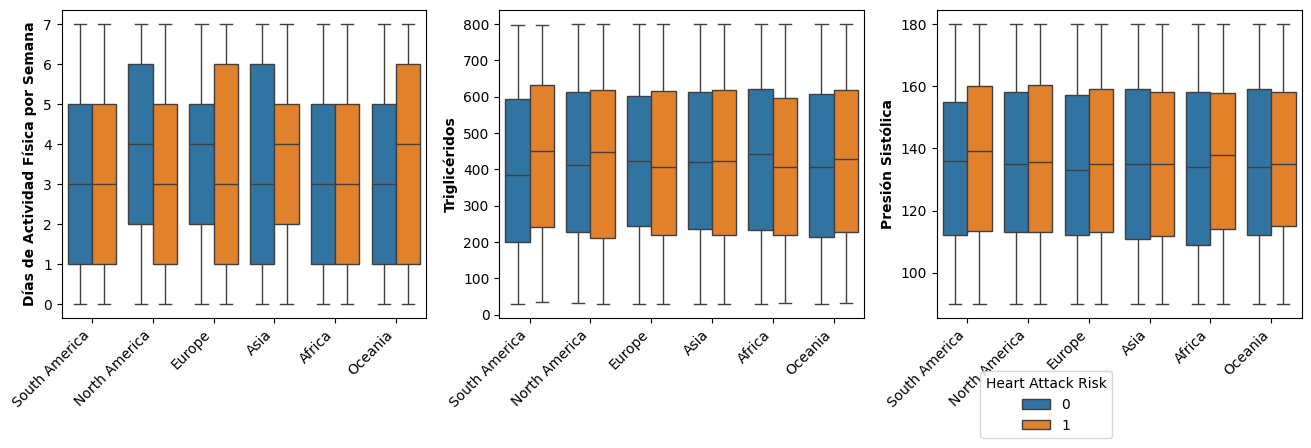

In [ ]:
# Defino la figura y configuro para tener los dos gráficos en una sola línea
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16, 4))

# Gráfico 1:
sns.boxplot(data=df_2_copy, x='Continent', y='Physical Activity Days Per Week', hue='Heart Attack Risk', ax=ax[0])
ax[0].set_xlabel('')
ax[0].set_ylabel('Días de Actividad Física por Semana', fontweight = 'bold', fontsize=10)
ax[0].get_legend().remove()
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, ha='right')

# Gráfico 2:
sns.boxplot(data=df_2_copy, x='Continent', y='Triglycerides', hue='Heart Attack Risk', ax=ax[1])
ax[1].set_xlabel('')
ax[1].set_ylabel('Triglicéridos', fontweight = 'bold', fontsize=10)
ax[1].get_legend().remove()
ax[1].set_xticklabels(ax[0].get_xticklabels(), rotation=45, ha='right')

# Gráfico 3:
sns.boxplot(data=df_2_copy, x='Continent', y='Systolic_pressure', hue='Heart Attack Risk', ax=ax[2])
ax[2].set_xlabel('')
ax[2].set_ylabel('Presión Sistólica', fontweight = 'bold', fontsize=10)
ax[2].set_xticklabels(ax[0].get_xticklabels(), rotation=45, ha='right')

# Creamos una leyenda para todos los gráficos
plt.legend(title='Heart Attack Risk', bbox_to_anchor=(0.5, -0.15))



✅ **Respecto a Días de Actividad Física**
* En South America y Africa encontramos una paridad respecto a las distribuciones de actividad física de ambas condiciones del paciente.
* En North America y Asia la actividad física es mayor para personas sin riesgo cardíaco.
* Por último en Europa y Oceania las personas con riesgo cardíaco son quienes tienen una mayor distribución de actividad física.

✅ **Respecto a Triglicéridos**
* No presentan paridad en medianas ni en cuartiles para ninguno de las clasificaciones analizadas.
* Encontramos que 'South America' presenta la mayor variabilidad entre pacientes con riesgo cardíaco y en esta condición es la que presenta los valores más altos para cada proporción del boxplot.
* Excepto en el continente africano todas las medidas para pacientes sin riesgo cardíaco están por debajo de los pacientes con cardiopatía.

✅ **Respecto a la Presión Sistólica**
* No encontramos variabilidad suficiente en sus distribuciones como para poder concluir que tienen una incidencia en el riesgo, a futuro podríamos trabajar sobre la inclusión de la variable 'Diástole' para conocer de esa manera si en su relación puede presentarnos un insight que demuestre un factor de riesgo significante.

### ⚓ **PANDAS PROFILING: Profundizando nuestro Análisis**

In [70]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
  Preparing metadata (setup.py) ... done


In [71]:
import pandas_profiling

profile = pandas_profiling.ProfileReport(df_2_copy)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

ImportError: matplotlib is required for plotting when the default backend "matplotlib" is selected.


✅ **Respecto a Smoking**
* La variable se presenta como desbalanceada y parece tener una correlación más fuerte con las variables Edad y Sexo.

✅ **Respecto a variables relacionadas a 'Descanso y Actividad Física'**
* Presentan una alerta por la cantidad de 'zeros' en sus datos, esto puede generar que su análisis estadístico presente como vimos anteriormente en las visualizaciones una variabilidad en la gráfica de sus cuartiles dentro del bloxplot representado para cada variable.

## 💻 **APLICACIÓN DE MODELOS DE MACHINE LEARNING: Optimizando nuestro trabajo**

### 🌟 **FEATURE SELECTION: Definiendo con métodos nuestros variables**

Un modelo de regresión logística es un tipo de modelo de regresión utilizado para predecir la probabilidad de que una variable dependiente categórica tenga un valor particular. Se utiliza para problemas de clasificación binaria o multiclase.

In [52]:
#Importo librería y método
from sklearn.preprocessing import MinMaxScaler

# Selecciona las características y la variable objetivo
X = df_2.drop('Heart Attack Risk', axis=1)
y = df_2['Heart Attack Risk']

# Aplico a las variables definidas en X
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(X)

# Este metodo trae un array por lo que lo transformo con pandas
X_scaled = pd.DataFrame(features_scaled, columns=X.columns)
X_scaled

,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Previous Heart Problems,...,Sex_Male,Diet_Average,Diet_Healthy,Diet_Unhealthy,Cont_Africa,Cont_Asia,Cont_Europe,Cont_North America,Cont_Oceania,Cont_South America
0,0.680556,0.314286,0.457143,0.0,0.0,1.0,0.0,0.0,0.20,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.041667,0.960714,0.828571,1.0,1.0,1.0,1.0,1.0,0.10,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.041667,0.728571,0.457143,1.0,0.0,0.0,0.0,0.0,0.10,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.916667,0.939286,0.471429,1.0,1.0,1.0,0.0,1.0,0.50,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.666667,0.707143,0.757143,1.0,1.0,1.0,1.0,0.0,0.30,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,0.583333,0.003571,0.300000,1.0,1.0,1.0,0.0,1.0,0.40,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8759,0.138889,0.000000,0.471429,1.0,0.0,0.0,1.0,0.0,0.85,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8760,0.402778,0.464286,0.928571,0.0,1.0,1.0,1.0,1.0,0.15,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8761,0.250000,0.207143,0.285714,1.0,0.0,1.0,0.0,0.0,0.20,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [53]:
# Importamos librería statsmodels - En estos apartados para no perder la linea del tratamiento en el nb es que dejaremos las importaciones en la sección correspondiente, luego consolidaremos a las primeras entregas
import statsmodels.api as sm
from statsmodels.discrete.discrete_model import Logit

# Definición de función forward selección según lo dado en clases
def forward_selection(data, target, significance_level=0.1):
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = Logit(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<significance_level):
            best_features.append(new_pval.idxmin())
        else:
            break
    return best_features

forward_best_features = forward_selection(X_scaled,y,significance_level = 0.125)
forward_best_features

<ipython-input-53-1389e67d8d15>:11: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.



Optimization terminated successfully.
         Current function value: 0.652293
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.652233
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.652380
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.652195
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.652377
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.652373
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.652344
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.652374
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.652381
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.652210
  

<ipython-input-53-1389e67d8d15>:11: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.



Optimization terminated successfully.
         Current function value: 0.652110
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.652041
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.652194
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.652190
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.652188
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.652157
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.652185
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.652193
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.652021
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.652190
  

<ipython-input-53-1389e67d8d15>:11: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.



Optimization terminated successfully.
         Current function value: 0.652017
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.652014
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.651982
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.652011
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.652020
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.652017
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.652005
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.651971
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.651850
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.652012
  

<ipython-input-53-1389e67d8d15>:11: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.



Optimization terminated successfully.
         Current function value: 0.651764
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.651699
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.651849
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.651846
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.651841
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.651811
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.651841
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.651848
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.651846
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.651834
  

<ipython-input-53-1389e67d8d15>:11: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.



Optimization terminated successfully.
         Current function value: 0.651610
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.651699
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.651695
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.651690
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.651660
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.651690
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.651697
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.651695
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.651682
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.651651
  

['Cholesterol', 'Sleep Hours Per Day', 'Systolic_pressure', 'Diabetes']

In [54]:
# Definición de función bacward elimination según lo dado en clases

def backward_elimination(data, target,significance_level = 0.125):
    features = data.columns.tolist()
    while(len(features)>0):
        features_with_constant = sm.add_constant(data[features])
        p_values =  Logit(target, features_with_constant).fit().pvalues[1:]
        max_p_value = p_values.max()
        if(max_p_value >= significance_level):
            excluded_feature = p_values.idxmax()
            features.remove(excluded_feature)
        else:
            break
    return features

backward_best_features = backward_elimination(X_scaled,y,significance_level = 0.125)
backward_best_features

Optimization terminated successfully.
         Current function value: 0.650954
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.650954
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.650954
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.650955
         Iterations 32
Optimization terminated successfully.
         Current function value: 0.650955
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.650957
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.650960
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.650960
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.650964
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.65097

['Cholesterol', 'Diabetes', 'Sleep Hours Per Day', 'Systolic_pressure']

In [55]:
# Definición de función bacward elimination según lo dado en clases

def stepwise_selection(data, target,SL_in=0.125,SL_out = 0.125):
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = Logit(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<SL_in):
            best_features.append(new_pval.idxmin())
            while(len(best_features)>0):
                best_features_with_constant = sm.add_constant(data[best_features])
                p_values = Logit(target, best_features_with_constant).fit().pvalues[1:]
                max_p_value = p_values.max()
                if(max_p_value >= SL_out):
                    excluded_feature = p_values.idxmax()
                    best_features.remove(excluded_feature)
                else:
                    break
        else:
            break
    return best_features

stepwise_best_features = stepwise_selection(X_scaled,y,SL_in=0.125,SL_out = 0.125)
stepwise_best_features

Optimization terminated successfully.
         Current function value: 0.652293
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.652233
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.652380
         Iterations 4


<ipython-input-55-a8ef940dfd52>:8: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.



Optimization terminated successfully.
         Current function value: 0.652195
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.652377
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.652373
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.652344
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.652374
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.652381
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.652210
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.652377
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.652365
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.652327
  

<ipython-input-55-a8ef940dfd52>:8: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.



Optimization terminated successfully.
         Current function value: 0.652190
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.652188
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.652157
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.652185
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.652193
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.652021
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.652190
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.652178
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.652139
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.652022
  

<ipython-input-55-a8ef940dfd52>:8: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.



Optimization terminated successfully.
         Current function value: 0.652020
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.652017
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.652014
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.651982
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.652011
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.652020
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.652017
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.652005
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.651971
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.651850
  

<ipython-input-55-a8ef940dfd52>:8: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.



Optimization terminated successfully.
         Current function value: 0.651841
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.651811
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.651841
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.651848
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.651846
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.651834
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.651801
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.651841
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.651820
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.651832
  

<ipython-input-55-a8ef940dfd52>:8: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.




         Current function value: 0.651695
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.651690
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.651660
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.651690
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.651697
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.651695
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.651682
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.651651
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.651689
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.651668
         Iterations 4
Optimization term

['Cholesterol', 'Sleep Hours Per Day', 'Systolic_pressure', 'Diabetes']

In [56]:
# Resumen de los resultados obtenidos en cada uno de los feature selection

print('forward_best_features: ',len(forward_best_features), forward_best_features)
print('backward_best_features: ',len(backward_best_features), backward_best_features)
print('stepwise_best_features:a ',len(stepwise_best_features), stepwise_best_features)

forward_best_features:  4 ['Cholesterol', 'Sleep Hours Per Day', 'Systolic_pressure', 'Diabetes']
backward_best_features:  4 ['Cholesterol', 'Diabetes', 'Sleep Hours Per Day', 'Systolic_pressure']
stepwise_best_features:a  4 ['Cholesterol', 'Sleep Hours Per Day', 'Systolic_pressure', 'Diabetes']


✅ **Conclusión**

Hemos aplicado una selección de variables considerando el modelo de regresión logística. En ellos hemos encontrado la repetición de las cuatro variables, de las cuales probaremos su precisión respecto a nuestros datos a través de un summary.

In [57]:
model_st = sm.Logit(y, sm.add_constant(X_scaled[stepwise_best_features])).fit()

# Imprimir el resumen del modelo
print(model_st.summary())

Optimization terminated successfully.
         Current function value: 0.651699
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:      Heart Attack Risk   No. Observations:                 8763
Model:                          Logit   Df Residuals:                     8758
Method:                           MLE   Df Model:                            4
Date:                Mon, 18 Mar 2024   Pseudo R-squ.:                0.001046
Time:                        21:32:41   Log-Likelihood:                -5710.8
converged:                       True   LL-Null:                       -5716.8
Covariance Type:            nonrobust   LLR p-value:                   0.01763
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.7130      0.075     -9.496      0.000      -0.860      -0.566
Ch

✅ **Lectura de resultados**

* const: la constante es -0.71, valor que se espera cuando las variables independientes son 0.
* Cholesterol: es 0.14. Indica el cambio esperado en la variable dependiente por cada cambio de una unidad en "Cholesterol".
* Sleep Hours Per Day: es -0.12.
* Systolic_pressure: es 0.13
* Diabetes: es 0.08.

**Estadísticas de ajuste del modelo:**

* El pseudo r-squared es 0.001, lo que sugiere que solo el 0.1% de la variabilidad en la variable dependiente es explicada por el modelo.

**Pruebas de hipótesis individuales (P>|t|):**

Los p-valores asociados con los coeficientes individuales indican la significancia estadística de cada variable en el modelo.

**Intervalos de confianza ([0.025 | 0.975]):**
En todos los casos el intervalo de confianza incluye el valor cero, es decir que el coeficiente no es significativamente diferente de cero al nivel de significancia (12.5%). Esto podría sugerir que la variable correspondiente no tiene un efecto significativo en la variable de respuesta.

En conclusión, las variables para la muestra seleccionada parecen no ser estadísticamente significativas.

### 🌳 **RANDOM FOREST Y MATRIZ DE CONFUSIÓN: Análisis de métricas en la predición**

In [58]:
# Importo librerías necesarias para trabajar sobre modelos de predicción en nuestro dataset
# Preparo train y test (retomo df escalado anteriormente en features selection)

from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y,random_state = 0,test_size=0.35)


In [59]:
# Entreno el modelo de RandomForest
model = RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [60]:
# Predicción de target y
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [61]:
print('Accuracy of Random Forest classifier on training set: {:.2f}'
     .format(model.score(X_train, y_train)))
print('Accuracy of Random Forest classifier on test set: {:.2f}'
     .format(model.score(X_test, y_test)))

Accuracy of Random Forest classifier on training set: 1.00
Accuracy of Random Forest classifier on test set: 0.63


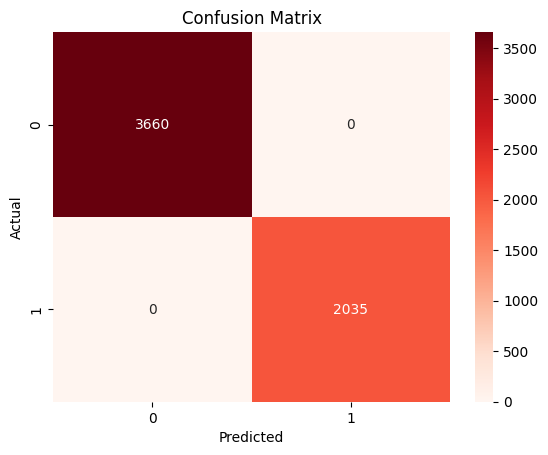

1.0


In [62]:
# Evaluo el modelo a través de una Matriz de Confusión y su 'accuracy rate'

cm_rf = confusion_matrix(y_train, y_pred_train)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
acc_rf1 = accuracy_score(y_train, y_pred_train)
print(acc_rf1)

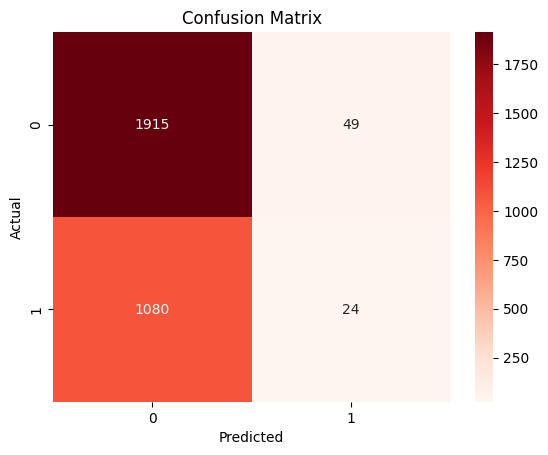

0.6320078226857888


In [63]:
# Evaluo el modelo a través de una Matriz de Confusión y su 'accuracy rate'

cm_rf = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
acc_rf = accuracy_score(y_test, y_pred_test)
print(acc_rf)

✅ **Lectura de resultados**

* Verdaderos Positivos (29): Correctamente predecidos con riesgo de ataque cardíaco.
* Verdaderos Negativos (1634): Correctamente predecidos sin riesgo de ataque cardíaco.
* Falsos Positivos (39): Incorrectamente predecidos con riesgo de ataque cardíaco.
* Falsos Negativos (922): Incorrectamente predecidos sin riesgo de ataque cardíaco.

> Existen dos grandes factores que tienen una importante relevancia y que debemos cuidar respecto al modelo que definiremos para nuestra investigación. En este caso es la importancia de dar un diagnóstico incorrecto, y si bien nuestro modelo parece no estar entrenado para detectar positivos, el resultado de los falsos negativos es lo que médicamente no debería suceder.

In [64]:
from sklearn.metrics import classification_report
print(classification_report(y_pred = y_pred_train, y_true= y_train))
print(classification_report(y_pred = y_pred_test, y_true= y_test))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3660
           1       1.00      1.00      1.00      2035

    accuracy                           1.00      5695
   macro avg       1.00      1.00      1.00      5695
weighted avg       1.00      1.00      1.00      5695

              precision    recall  f1-score   support

           0       0.64      0.98      0.77      1964
           1       0.33      0.02      0.04      1104

    accuracy                           0.63      3068
   macro avg       0.48      0.50      0.41      3068
weighted avg       0.53      0.63      0.51      3068



✅ **Interpretación del resultado:**
1. Precisión (Precision): El 64% de las instancias predichas como clase 0 fueron realmente de la clase 0; para la clase 1, 40% fueron realmente de la clase 1.
2. Sensibilidad (Recall): El 98% de las instancias reales de la clase 0 fueron identificadas correctamente. Pero sólo el 2% de la clase 1.
3. Puntuación F1 (F1-Score): Para la clase 0 fue 0.78 mientras que para la clase 1: 0.04.

Podemos concluir entonces que el modelo:
* Tiene una sensibilidad muy alta para pacientes sin riesgo cardíaco (97%) pero muy baja para los registros positivos (2%). Esto indica que el modelo tiende a predecir de manera efectiva los casos negativos pero tiene dificultades para identificar los positivos.
* Muestra limitaciones por lo que deberemos trabajar en el data para obtener una calidad de datos mayor y por ende un mejor rendimiento.

📢 **NOTA:** No se considera métrica accuracy por el desbalanceo que presenta el dataset.

#### **IMPORTANCIA DE VARIABLES SEGÚN EL MODELO**

In [65]:
model.feature_importances_

array([0.07867822, 0.08399902, 0.07839662, 0.01277051, 0.01383158,
       0.00597013, 0.01277223, 0.01331165, 0.06339945, 0.0140941 ,
       0.01461229, 0.05027317, 0.0558483 , 0.06519619, 0.08725657,
       0.04658962, 0.04046607, 0.07876787, 0.07526548, 0.0094864 ,
       0.00940529, 0.01085955, 0.0115913 , 0.01110553, 0.00820187,
       0.01146425, 0.01134333, 0.00760337, 0.00820427, 0.00923576])

In [66]:
len(model.feature_importances_)

30

In [67]:
len(X_train.columns)

30

Text(0.5, 0, 'Random Forest Feature Importance')

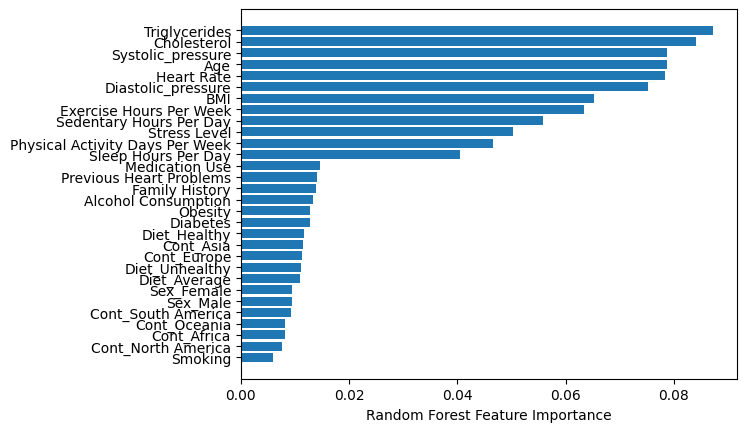

In [68]:
sorted_idx = model.feature_importances_.argsort()
plt.barh(X_train.columns[sorted_idx], model.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

#### **APROXIMACIÓN A LOS HIPERPARÁMETROS PARA NUESTRO MODELO**

In [69]:
from sklearn.model_selection import GridSearchCV

# Definir la cuadrícula de parámetros a explorar
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto', 'sqrt']
}

# Crear el objeto GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

# Ajustar el modelo a los datos de entrenamiento
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros
best_params = grid_search.best_params_

# Obtener el mejor modelo
best_model = grid_search.best_estimator_

# Evaluar el mejor modelo en los datos de prueba
accuracy = best_model.score(X_test, y_test)

print("Mejores hiperparámetros encontrados:", best_params)
print("Exactitud del mejor modelo en el conjunto de prueba:", accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifi

Mejores hiperparámetros encontrados: {'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Exactitud del mejor modelo en el conjunto de prueba: 0.6401564537157758


## 🤙 **CONCLUSIONES Y PASOS A SEGUIR**

En el presente trabajo, nos hemos planteado como objetivo poder determinar un modelo de predicción que nos permita predecir una variable target, en este caso definir si el paciente presenta o no riesgo cardíaco.
Para esto hemos ido explorando, transformando y mejorando nuestros datos en pos de lograr una mayor calidad de los mismos y por consecuente una optimización de nuestros resultados.

Se han aplicado, según el tipo de variables y sus comportamientos, los métodos aprendidos para poder comprender la influencia de cada factor a la salud del paciente y a la presencia, o no, de esta cardiopatía. Podemos decir entonces que:

1.   **El riesgo cardíaco se encuentra presente en un 64%** de nuestra muestra
2.   La distribución de género es un **70% del sexo masculino y un 30% del sexo femenino** pero esta variable no se presenta como influyente respecto a la condición del paciente
3. El continente de los pacientes aunque muestra una **diferencia en la frecuencia de los distintos valores**, existe una mínima varianza entre estos valores. Por lo que **no podemos determinar la distribución geográfica como un factor de influencia.**
4. La edad tampoco se presenta como una variable de incidencia en la patología de los pacientes, **no se presentan diferencias en las distribuciones para los casos con riesgo cardíacos contra aquellos que no lo padecen.**

* Respecto al análisis de las demás variables - tanto categóricas como numéricas-, y adicionando a lo comentado en cada sección podemos comenzar a inferir que **no existen características de la muestra -según sus datos- que nos presenten una relación inequívoca con la patología estudiada.**
Si a este punto, lo profundizamos con el estudio realizado a partir del método de *pandas profiling* entenderemos que **tampoco las correlaciones entre las variables ya no sólo con la variable 'target' se presentan como determinantes** para predecir esta última.

* Por último concluyendo la interpretación respecto a la aplicación de modelos de Machine Learning, hemos visto que **no hemos podido llegar a resultados aceptables para la predicción de nuestra variable target.**

> Es por todo lo explicado anteriormente que se ha hecho una primera aproximación al concepto de hiperparámetros para modelos de Machine Learning pensando en lograr una optimización de los mismos y con ellos resultados aceptables para nuestra predicción. También debe entrar en consideración la aplicación de metodologías de balanceo de datasets que permita realizar una comparación equitativa -en cuanto a frecuencia de la variable target se refiere-.



